In [1]:
import pandas as pd
import seaborn as sns
import datetime


df_cas_france = pd.read_csv('data/covid-cas-france.csv', delimiter=',')
df_cas_region = pd.read_csv('data/covid-cas-region.csv', delimiter=',')

/var/folders/4d/zt9y765s59xg9rkbzf15mwhc0000gn/T/ipykernel_96957/2909894295.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cas_region = pd.read_csv('data/covid-cas-region.csv', delimiter=',')


In [2]:
df_cas_france.shape

(1071, 21)

In [3]:
df_cas_france

,date,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,...,incid_rad,incid_dchosp,conf,conf_j1,pos,esms_dc,dc_tot,pos_7j,cv_dose1,esms_cas
0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2022-12-24,21.44,428.66,0.285686,0.790601,1445.0,25119.0,816260.0,131755.0,52.0,...,715.0,51.0,NaN,40744.0,24283.0,29455.0,161210.0,290901.0,NaN,458186.0
1067,2022-12-25,21.33,421.26,0.285686,NaN,1445.0,25088.0,816395.0,131773.0,11.0,...,134.0,18.0,NaN,23681.0,3299.0,29461.0,161234.0,285885.0,NaN,459039.0
1068,2022-12-26,NaN,NaN,0.287465,NaN,1454.0,25043.0,817495.0,131906.0,110.0,...,1101.0,133.0,NaN,5429.0,NaN,29461.0,161367.0,NaN,NaN,459063.0
1069,2022-12-27,NaN,NaN,0.286081,NaN,1447.0,25084.0,819080.0,132112.0,185.0,...,1604.0,208.0,NaN,30989.0,NaN,29463.0,161575.0,NaN,80.5,459147.0


Pour l'élaboration du premier graphique *Nombre de cas en France en fonction du temps* il nous faut conserver deux variables, une permettant de donner la temporalité et une donnant le nombre de cas à cette date.
Selon la desription des données:
* date : Date
* conf : Nombre de cas confirmés
On peut donc écarter toutes les autres features qui ne nous serviront pas pour l'élaboration du graphique 1.

In [126]:
# Looking for duplicated values

print('No of duplicated values in both DF: France: ' + str(df_cas_france.duplicated().sum()) + " Régions: " + str(df_cas_region.duplicated().sum()))

No of duplicated values in both DF: France: 0 Régions: 0


In [4]:
# Looking for missing values

cas_missing = df_cas_france.loc[:, ['date', 'conf', 'conf_j1', 'pos']].isna().sum()
cas_missing

date          0
conf       1071
conf_j1     294
pos         114
dtype: int64

<AxesSubplot: >

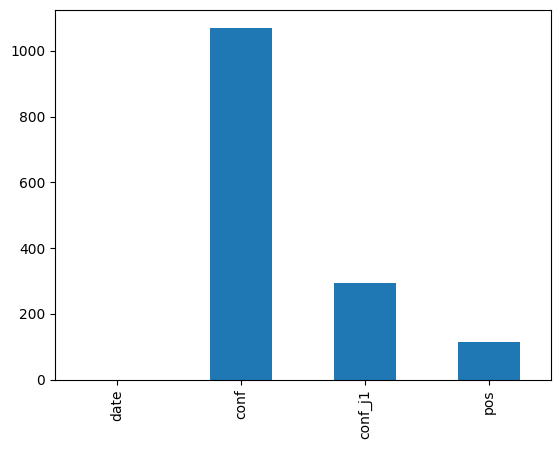

In [5]:
# Plotting missing values

cas_missing.plot(kind='bar')

La variable conf ne conctient que des valeurs est entièrement vide, elle ne sera donc pas utilisée. Il y a deux alternatives:
1. conf_j1 : Nombre de nouveaux cas confirmés (j-1 date de résultats)
2. pos : Nombre de cas déclarés positifs (j-3 date de prélèvement)

<AxesSubplot: title={'center': 'Répartition des données entre conf_j1 et pos'}, xlabel='Frequency'>

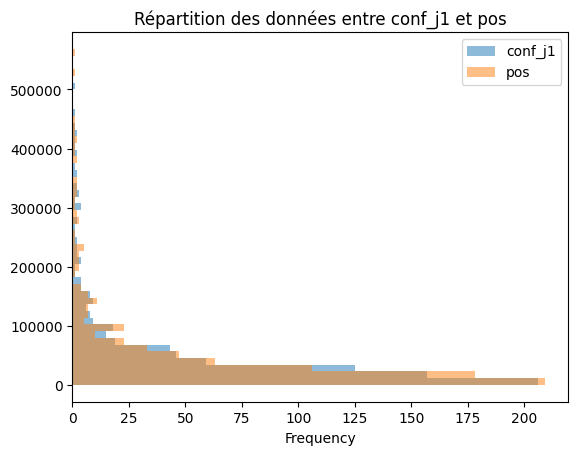

In [6]:
# Values repartition bewtween conf_j1 and pos

df_cas_france.loc[(df_cas_france['conf_j1'].notnull() & df_cas_france['pos'].notnull()), ['conf_j1', 'pos']].plot.hist(bins=50, alpha=0.5, orientation='horizontal', title='Répartition des données entre conf_j1 et pos')

Les données semblant relativement simmilaires, il faut faire un choix quant à laquelle des deux variable utiliser. Selon le [tableau de bord COVID-19](https://www.gouvernement.fr/info-coronavirus/carte-et-donnees#vue_d_ensemble_-_taux_d_incidence) mis en place par l'état, le nombre de cas est quantifié par la moyenne du nombre de cas déclarés positifs de j-3 à j-9 par rapport à la date étudiée pour obtenir une tendance plus "lisse". 

<AxesSubplot: >

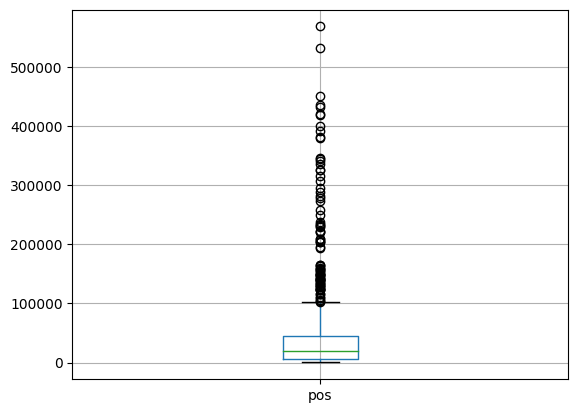

In [7]:
# Looking for outliers

df_cas_france['date'] = pd.to_datetime(df_cas_france['date'], format='%Y/%m/%d') 
df_cas_france.loc[df_cas_france['pos'].notnull(), ['pos']].boxplot()

Nous allons vérifier les données les plus grandes pour déterminer si elles sont abérrantes ou explicables.

In [8]:
# Finding out if highest values are outliers

df_cas_france.loc[df_cas_france['pos'] > 400000, ['date','pos']]

,date,pos
711,2022-01-03,435037.0
718,2022-01-10,431709.0
725,2022-01-17,531122.0
726,2022-01-18,418010.0
727,2022-01-19,419836.0
732,2022-01-24,568310.0
739,2022-01-31,450455.0


<AxesSubplot: xlabel='date'>

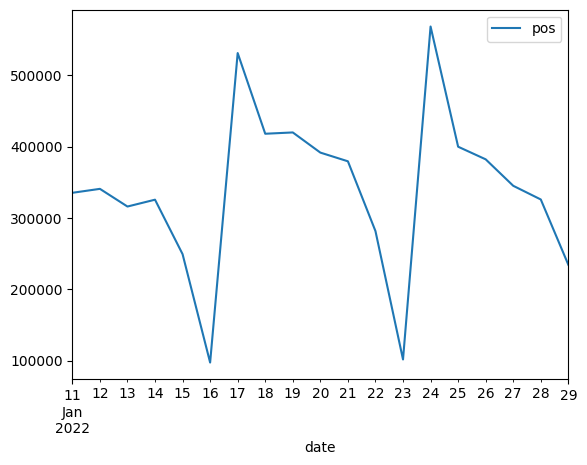

In [9]:
# Plotting time serie where pos value is the highest 

date_min = datetime.date(2022, 1, 10)
date_max = datetime.date(2022, 1, 30)

df_cas_france.loc[((df_cas_france['date'].dt.date > date_min) & (df_cas_france['date'].dt.date < date_max)), ['date','pos']].set_index('date').plot()

La tendance du nombre de cas n'est pas anormale sur la période comprenant les outliers, ils sont donc explicables et seront **conservés**.

<AxesSubplot: title={'center': 'Nombre de nouveaux cas en France'}, xlabel='Date', ylabel='Nombre de cas'>

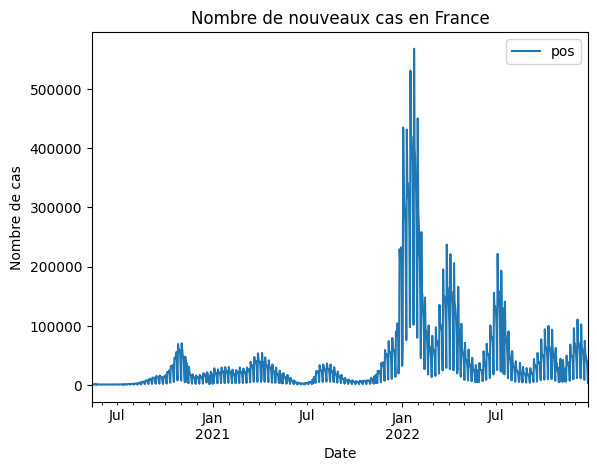

In [10]:
# Plotting chart 1

plot1_data = df_cas_france.loc[df_cas_france['pos'].notnull(), ['date', 'pos']]
plot1_data['date'] = pd.to_datetime(plot1_data['date'], format='%Y/%m/%d') 
plot1_data.set_index('date').plot(title='Nombre de nouveaux cas en France', xlabel='Date', ylabel='Nombre de cas')

In [11]:
# Converting date feature to date format

plot1_data['date'] = pd.to_datetime(plot1_data['date'], format='%Y/%m/%d')
plot1_data.dtypes

date    datetime64[ns]
pos            float64
dtype: object

<AxesSubplot: title={'center': 'Nombre de nouveaux cas en France'}, xlabel='Date', ylabel='Nombre de cas'>

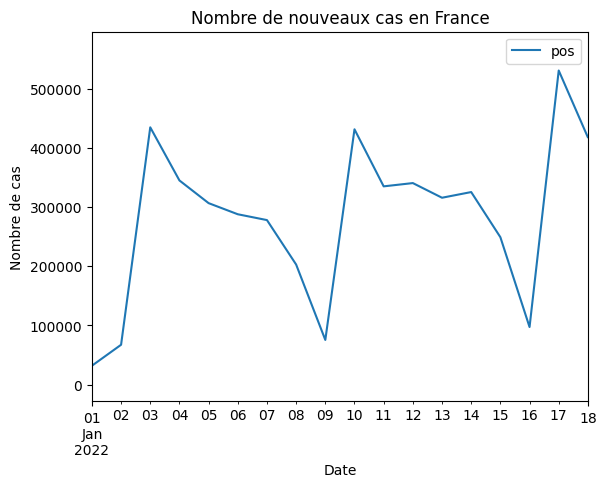

In [12]:
# Chart 1 with date range

date_range = [datetime.date(2022, 1, 1), datetime.date(2022, 1, 18)]
plot1_data.set_index('date').plot(title='Nombre de nouveaux cas en France', xlabel='Date', ylabel='Nombre de cas', xlim=date_range)

On remarque ci-dessus l'intérer de "lisser" les données en prenant une moyenne sur plusieurs jours: chaque samedi et dimanche, les chiffres s'éffondrent: la raison les centres de dépistages qui sont fermés puis le lundi les chiffres semblent exagérés par rapport au reste de la semaine.
Plusieurs solutions:
1. Reproduire la méthode du dashboard du gouvernement
2. Écarter les samedis, dimanches et lundis

In [13]:
# Removing end of week days then plot

plot1_data['day'] = plot1_data['date'].dt.day_name()
plot1_data.head()

,date,pos,day
111,2020-05-13,901.0,Wednesday
112,2020-05-14,1015.0,Thursday
113,2020-05-15,1044.0,Friday
114,2020-05-16,292.0,Saturday
115,2020-05-17,142.0,Sunday


<AxesSubplot: title={'center': 'Nombre de nouveaux cas en France (sans samedi, dimanche, lundi)'}, xlabel='Date', ylabel='Nombre de cas'>

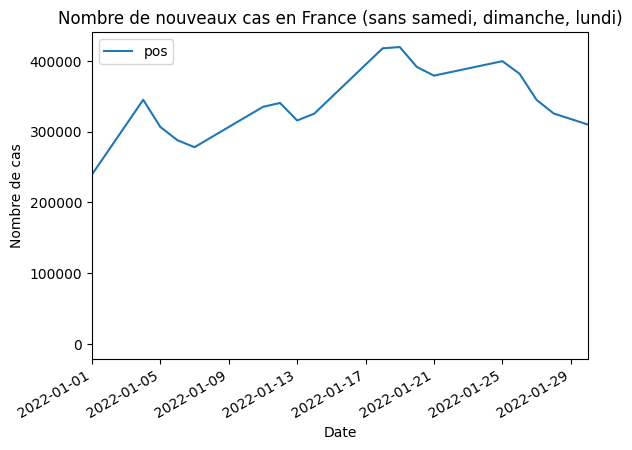

In [14]:
# Chart 1 without Saturday Sunday and Monday

except_days = ['Saturday', 'Sunday', 'Monday']
plot1_data_no_we = plot1_data.loc[~plot1_data['day'].isin(except_days)].set_index('date')

date_range = [datetime.date(2022, 1, 1), datetime.date(2022, 1, 30)]
plot1_data_no_we.plot(title='Nombre de nouveaux cas en France (sans samedi, dimanche, lundi)', xlabel='Date', ylabel='Nombre de cas', xlim=date_range)

<AxesSubplot: title={'center': 'Nombre de nouveaux cas en France (sans samedi, dimanche, lundi)'}, xlabel='Date', ylabel='Nombre de cas'>

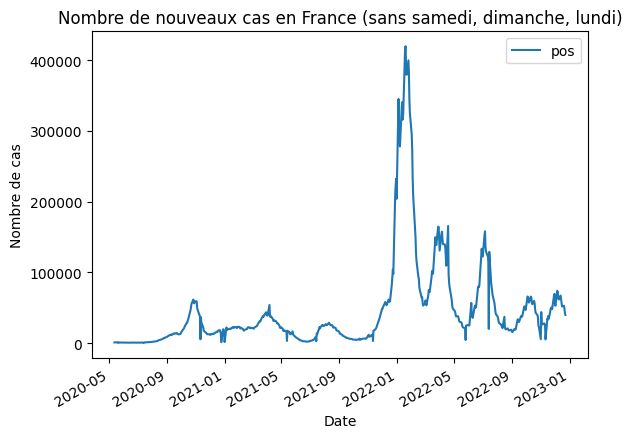

In [15]:
# Final Chart1

plot1_data_no_we.plot(title='Nombre de nouveaux cas en France (sans samedi, dimanche, lundi)', xlabel='Date', ylabel='Nombre de cas')

Le graphique sans les samedis, les dimanches et les lundis semble bien plus lisible.

<AxesSubplot: title={'center': 'Nombre de nouveaux cas en France (sans samedi, dimanche, lundi)'}, xlabel='Date', ylabel='Nombre de cas'>

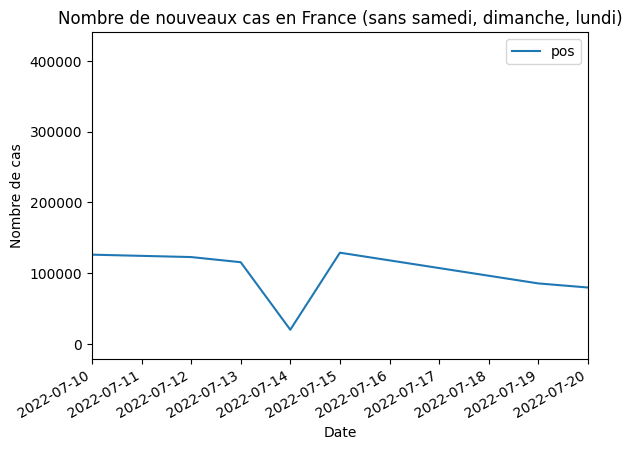

In [17]:
date_range = [datetime.date(2022, 7, 10), datetime.date(2022, 7, 20)]
plot1_data_no_we.plot(title='Nombre de nouveaux cas en France (sans samedi, dimanche, lundi)', xlabel='Date', ylabel='Nombre de cas', xlim=date_range)

On remarque certaines pics négatifs du nombre de cas, cela peut s'expliquer en parti par les jours feriés.

<AxesSubplot: title={'center': 'Nombre de nouveaux cas en France (nettoyé)'}, xlabel='Date', ylabel='Nombre de cas'>

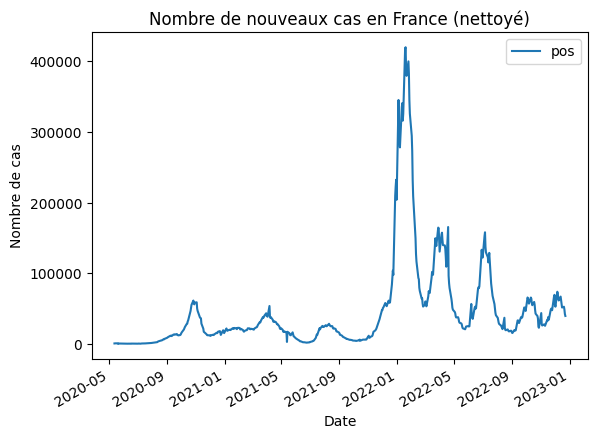

In [66]:
# Removing holidays
import matplotlib.pyplot as plt

holidays_dates  = [
    "0101",
    "1704",
    "1804",
    "0105",
    "0805",
    "2605",
    "0606",
    "1407",
    "1508",
    "0111",
    "1111",
    "2512"
]

mask = (~plot1_data_no_we.index.strftime('%d%m').isin(holidays_dates))
plot1_data_no_we.loc[mask].plot(title='Nombre de nouveaux cas en France (nettoyé)', xlabel='Date', ylabel='Nombre de cas')

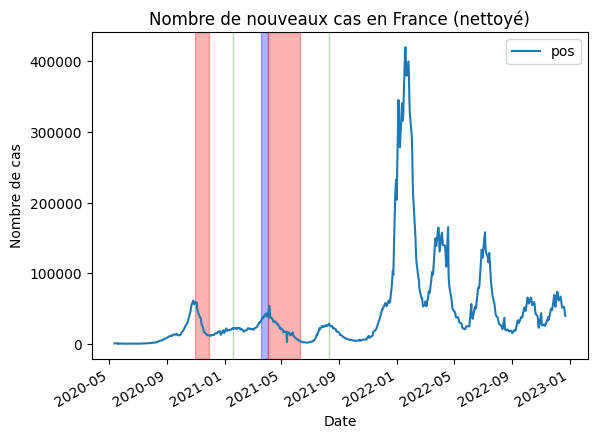

In [80]:
# Adding covid phases

covid_phases = [
    {
        'min': "2020-10-30",
        'max': "2020-11-28",
        'color': "red",
        'label': "Confinement total 1",
    },
    {
        'min': "2021-01-18",
        'max': "2021-01-18",
        'color': "green",
        'label': "Couvre feu 1",
    },
    {
        'min': "2021-03-20",
        'max': "2021-04-03",
        'color': "blue",
        'label': "Confinement partiel 1",
    },
    {
        'min': "2021-04-03",
        'max': "2021-06-09",
        'color': "red",
        'label': "Confinement total 2",
    },
    {
        'min': "2021-08-09",
        'max': "2021-08-09",
        'color': "green",
        'label': "Passe sanitaire",
    }
]
plot1_data_no_we.loc[mask].plot(title='Nombre de nouveaux cas en France (nettoyé)', xlabel='Date', ylabel='Nombre de cas')
for covid_phase in covid_phases:
    plt.axvspan(covid_phase['min'], covid_phase['max'], color=covid_phase['color'], label=covid_phase['label'], alpha=0.3)

# Graphique 1: Conclusion

Les données d'entrée sont propres et ne nécessitent aucune intervention de nettoyage si ce n'est l'exclusion des données vides des variables date et pos.

On pourrait fournir 2 versions du premier graphique: un avec les samedis, dimanches, lundis et jours fériées et un sans afin d'obtenir une tendance plus représentative et mais moins factuelle. L'utilisateur pourrait en un clic sur un switch changer le graphique.

In [81]:
df_cas_region

,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,01,2020-03-18,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.062612,NaN,2,...,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2020-03-19,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.132379,NaN,2,...,0,79,1.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN
2,01,2020-03-20,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.155635,NaN,2,...,0,87,0.0,0.0,1.0,0.0,16.0,NaN,NaN,NaN
3,01,2020-03-21,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.173524,NaN,4,...,0,88,3.0,0.0,0.0,0.0,15.0,NaN,NaN,NaN
4,01,2020-03-22,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.212880,NaN,8,...,0,106,3.0,1.0,1.0,0.0,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102611,976,2022-12-24,6,Mayotte,Mayotte,1.77,8.69,0.000000,0.56,8,...,163,0,0.0,0.0,0.0,0.0,0.0,2.0,26.0,NaN
102612,976,2022-12-25,6,Mayotte,Mayotte,1.61,8.02,0.000000,NaN,8,...,163,0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,NaN
102613,976,2022-12-26,6,Mayotte,Mayotte,NaN,NaN,0.000000,NaN,8,...,163,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
102614,976,2022-12-27,6,Mayotte,Mayotte,NaN,NaN,0.000000,NaN,8,...,163,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,54.2


In [116]:
df_cas_region['lib_reg'].unique()

array(['Auvergne et Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Occitanie',
       'Normandie', 'Nouvelle Aquitaine', 'Centre-Val de Loire',
       'Bourgogne et Franche-Comté', 'Bretagne', 'Corse',
       'Pays de la Loire', 'Île-de-France', 'Guadeloupe', 'Martinique',
       'Guyane', 'Réunion', 'Mayotte'], dtype=object)

# Ressources utilisées

* 